# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print (df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [4]:
#function

In [5]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: the two are different data points using different scales. GPA's highest value can only be 4 and GRE's highest value can only be 800

#### Question 4. Drop data points with missing data


In [6]:
df2=df_raw.dropna(axis=0, how='any')

In [7]:
df2.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Confirmed, by running .describe() on the new data frame. there were a total of 3 missing values across gre, gpa, and prestige. the total dataset was a count of 400. when dropped the count across all variables is now 397

#### Question 6. Create box plots for GRE and GPA

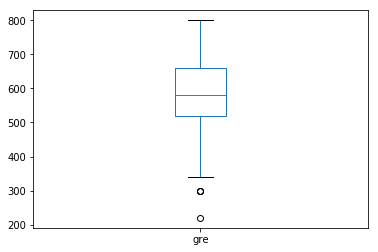

In [8]:
#boxplot 1
df2[['gre']].plot(kind='box')

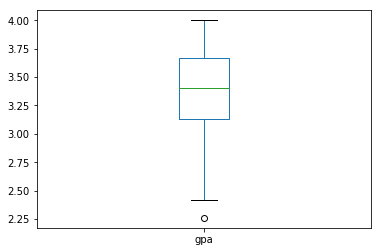

In [9]:
#boxplot 2 
df2[['gpa']].plot(kind='box')

#### Question 7. What do this plots show?

Answer: for GRE the data look pretty evenly quartiled with a median close to 600. However, the data also shows two outliers that fall outside of the boxplot.
For GPA the data shows a big range of scores in the first quartile and overall in the 1st 50%. We can also see an outlier in gap in a score that fall outside of the first quartile. 

#### Question 8. Describe each distribution 

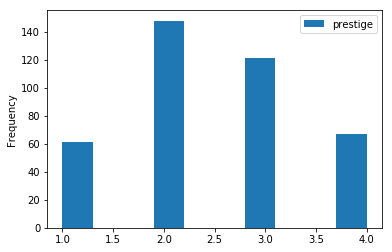

In [10]:
df2[['prestige']].plot(kind='hist')

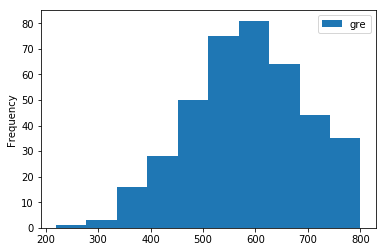

In [11]:
# plot the distribution of each variable 
df2[['gre']].plot(kind='hist')

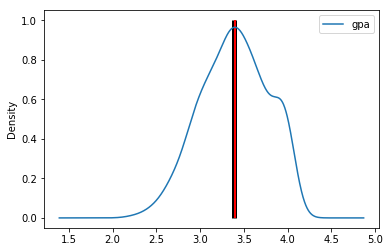

In [12]:
# plot the distribution of each variable 
df2[['gpa']].plot(kind='density')
plt.vlines(df2[['gpa']].mean(),
          ymin=0,
          ymax=1,
          linewidth=5)
plt.vlines(df2[['gpa']].median(),
          ymin=0,
          ymax=1,
          linewidth=2,
          color='red')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, our distirubtion is not symmetrical

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, there is some skewness/outliers in the data. We can correct this by transforming the data using the .sqrt() or .log() method. 

#### Question 11. Which of our variables are potentially colinear? 

In [13]:
# create a correlation matrix for the data
df2.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: GRE and GPA variables are potentially colinear as their correlation coefficient is very similar

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Create a Regression Model
1. Create a null hypothesis to test (e.g., there is no relationship between prestige and admittance
+ import stats model
* create a fitted model
+ identify if the p-value is less than .05 (does not include 0) to reject null hypothesis

#### Question 14. What is your hypothesis? 

Answer: Null Hypothesis - There is no relationship between higher undergraduate prestige and admittance. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [14]:
#median replacement
df3=df_raw.fillna(df_raw.median())
df3.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,588.000000,3.390950,2.48500
std,0.466087,115.339751,0.379675,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


#### 2. Bonus: Log transform the skewed data

In [15]:
#log transform of GRE

df_log = df2[['gre']].apply(np.log) 

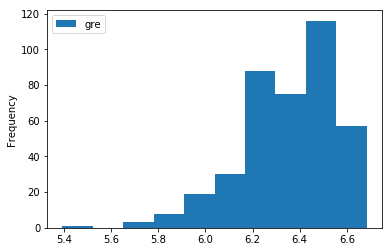

In [16]:
df_log[['gre']].plot(kind='hist')

In [17]:
#log transform of GPA

df_log = df2[['gpa']].apply(np.log) 

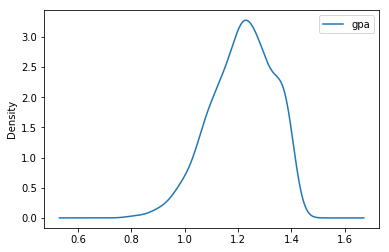

In [18]:
df_log[['gpa']].plot(kind='density')

#### 3. Advanced: Impute missing data